# Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Elimination

In this section we remove entries from both the datasets according to some criteria we define below.

As we noticed in the DU part, there are some cyclists in ```cyclists.csv``` which did not appear in ```races.csv``` i.e. we have a group of cyclists who did not participated to any races.
Since they has no relevant informations regurding their carreer we decide to drop them

In [3]:
cyclists_df = pd.read_csv('../dataset/cyclists.csv')
races_df = pd.read_csv('../dataset/races.csv')

In [4]:
# Identify cyclists who did not participate in races
cyclists_not_in_races = np.setdiff1d(cyclists_df['_url'].unique(), races_df['cyclist'].unique())

initial_cyclists_count = len(cyclists_df)

# Remove cyclists who did not participate
cyclists_df = cyclists_df[~cyclists_df['_url'].isin(cyclists_not_in_races)]

removed_cyclists_count = initial_cyclists_count - len(cyclists_df)

print(f"Occurrences of cyclists removed: {removed_cyclists_count}")

Occurrences of cyclists removed: 39


## Cyclists Dataset

### Casting

We force the correct type for the ```cyclists.csv``` dataset attributes.

Before the casting types are:

In [5]:
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6095 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6095 non-null   object 
 1   name         6095 non-null   object 
 2   birth_year   6082 non-null   float64
 3   weight       3062 non-null   float64
 4   height       3127 non-null   float64
 5   nationality  6094 non-null   object 
dtypes: float64(3), object(3)
memory usage: 333.3+ KB


We perform the casting:

In [6]:
# Cast _url, name, and nationality to string
cyclists_df['_url'] = cyclists_df['_url'].astype("string")
cyclists_df['name'] = cyclists_df['name'].astype("string")
cyclists_df['nationality'] = cyclists_df['nationality'].astype("string")

In [7]:
# Cast birth_year to int (more easy to manipulate)
cyclists_df['birth_year'] = cyclists_df['birth_year'].astype('Int64')

Check if the types are now correct:

In [8]:
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6095 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6095 non-null   string 
 1   name         6095 non-null   string 
 2   birth_year   6082 non-null   Int64  
 3   weight       3062 non-null   float64
 4   height       3127 non-null   float64
 5   nationality  6094 non-null   string 
dtypes: Int64(1), float64(2), string(3)
memory usage: 339.3 KB


### Null Values

Below we plot the heatmap of the null values in the cyclists dataset.

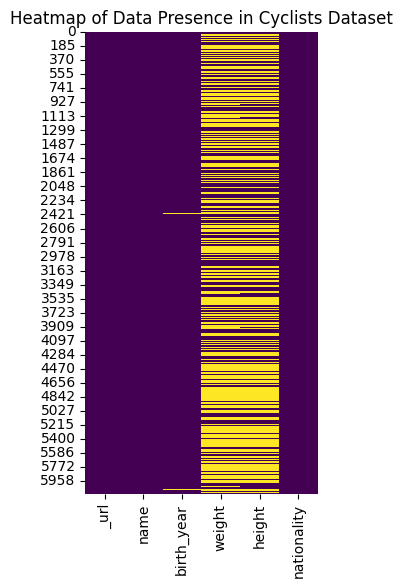

In [9]:
# Heatmap of the presence of data in the cyclists_df dataset
plt.figure(figsize=(3, 6))
sns.heatmap(cyclists_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Data Presence in Cyclists Dataset')
plt.show()

As observed in data understanding phase, and recalling from it from the heatmap the most null values are in ```height``` and ```weight``` columns. Now we manage the null values in each column of the cyclists dataset.

#### ```birth_year``` column

In [10]:
cyclists_df[cyclists_df['birth_year'].isnull()]


,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,<NA>,NaN,NaN,<NA>
601,vladimir-malakov,Vladimir Malakov,<NA>,NaN,NaN,Russia
894,antonio-zanini,Antonio Zanini,<NA>,NaN,NaN,Italy
2408,filippo-simonetti,Filippo Simonetti,<NA>,NaN,NaN,Italy
2515,carlos-garcia,Carlos García,<NA>,NaN,NaN,Spain
2536,alexandr-osipov,Alexandr Osipov,<NA>,NaN,NaN,Russia
3046,nicolai-kosyakov,Nicolai Kosyakov,<NA>,NaN,NaN,Russia
3551,nevens-guy,Guy Nevens,<NA>,NaN,NaN,Belgium
4142,oscar-pumar,Oscar Pumar,<NA>,NaN,NaN,Venezuela
4384,javier-luquin,Javier Luquin,<NA>,NaN,NaN,Spain


As there are very few entries, we impute the missing values for the birthday by doing an online search (see the report for the complete list of sources used).

In [11]:
cyclists_df.loc[cyclists_df['_url'] == 'scott-davies', 'birth_year'] = 1995
cyclists_df.loc[cyclists_df['_url'] == 'vladimir-malakov', 'birth_year'] = 1958
cyclists_df.loc[cyclists_df['_url'] == 'antonio-zanini', 'birth_year'] = 1965

To impute the ```birth_year``` value of ```javier-luqin``` we looked up the website procyclingstats.com retrieving the following race(s) in which he participated according to the ```races.csv``` dataset.

In [12]:
races_df[races_df['cyclist'] == 'javier-luquin']

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
303965,giro-d-italia/1992/stage-19,Giro d'Italia,80.0,NaN,201000.0,NaN,NaN,953,NaN,1992-06-12 06:08:37,74,javier-luquin,NaN,True,False,False,NaN,966.0


Then, we retrieve the card of ```javier-luquin``` to obtain his birthday. However, we noticed that Giro d'Italia '92 was participated by Luis Javier Lukin and not Luquin. We checked also ```cyclists.csv``` by noticing that Luis Javier Lukin is present and he also has some races entries in ```races.csv``` which are the same reported in the webpage. We conclude that there is a mistake in the cyclist indentifier.

We then change the cyclist identifier in ```races.csv``` and delete the wrong record in ```cyclists.csv```.

In [13]:
# Drop the row with the URL 'javier-luquin'
cyclists_df.drop(cyclists_df[cyclists_df['_url'] == 'javier-luquin'].index, inplace=True)

# Verify the row has been dropped
(cyclists_df[cyclists_df['_url'] == 'javier-luquin'])

,_url,name,birth_year,weight,height,nationality


In [14]:
# We check how many occurrences of 'javier-luquin' and 'javier-lukin' are in the races dataset before manipulating the data
luquin_count = races_df[races_df['cyclist'] == 'javier-luquin'].shape[0]
lukin_count = races_df[races_df['cyclist'] == 'javier-lukin'].shape[0]

print(f"Occurrences of 'javier-luquin': {luquin_count}")
print(f"Occurrences of 'javier-lukin': {lukin_count}")

Occurrences of 'javier-luquin': 1
Occurrences of 'javier-lukin': 101


In [15]:
# Replace 'javier-luquin' with 'javier-lukin' in the cyclist column
races_df['cyclist'] = races_df['cyclist'].replace('javier-luquin', 'javier-lukin')

# Verify the replacement has been made successfully
luquin_count = races_df[races_df['cyclist'] == 'javier-luquin'].shape[0]
lukin_count = races_df[races_df['cyclist'] == 'javier-lukin'].shape[0]

print(f"Occurrences of 'javier-luquin': {luquin_count}")
print(f"Occurrences of 'javier-lukin': {lukin_count}")

Occurrences of 'javier-luquin': 0
Occurrences of 'javier-lukin': 102


The remaining cyclists participated only in one race for each, so their weight on the overall data is minimal. For this reason, we decided to impute their birth year using a simple approach: we calculate the average debut age of the cyclists according to our data and subtract it from the first stage date of cyclists with missing age values to obtain an approximate birth year.

In [16]:
# We create a temporary column to store the year of the races
races_df['race_date'] = pd.to_datetime(races_df['date']).dt.year

# Calculate the debut year for each cyclist excluding the ones with missing birth year
valid_cyclists = cyclists_df[cyclists_df['birth_year'].notnull()]
min_race_date_per_cyclist = races_df.groupby('cyclist')['race_date'].min()
debut_age_per_cyclist = min_race_date_per_cyclist - valid_cyclists.set_index('_url')['birth_year']

# Calculate the average debut year
average_debut_age = int(debut_age_per_cyclist.mean())
print(f"Average debut year: {average_debut_age}")

# Drop race_date added column, not needed anymore
races_df.drop(columns=['race_date'], inplace=True)

Average debut year: 24


Now we calculated the average debut age of the cyclists in the dataset, we can impute the missing values in the ```birth_year``` column.

In [17]:
cyclists = [
    'filippo-simonetti',
    'carlos-garcia',
    'alexandr-osipov',
    'nicolai-kosyakov',
    'nevens-guy',
    'oscar-pumar',
    'thierry-lauder',
    'sergei-jermachenko',
    'batik-odriozola'
]

for cyclist in cyclists:
    # Get the oldest race date for the cyclist
    oldest_race_date = pd.to_datetime(races_df[races_df['cyclist'] == cyclist]['date']).min()
    
    # Calculate the birth year by subtracting the average debut age from the oldest race year
    birth_year = oldest_race_date.year - average_debut_age
    
    # Update the birth year in the cyclists_df DataFrame
    cyclists_df.loc[cyclists_df['_url'] == cyclist, 'birth_year'] = birth_year

# Verify the birth years have been updated
cyclists_df[cyclists_df['_url'].isin(cyclists)]

,_url,name,birth_year,weight,height,nationality
2408,filippo-simonetti,Filippo Simonetti,1973,NaN,NaN,Italy
2515,carlos-garcia,Carlos García,1977,NaN,NaN,Spain
2536,alexandr-osipov,Alexandr Osipov,1961,NaN,NaN,Russia
3046,nicolai-kosyakov,Nicolai Kosyakov,1961,NaN,NaN,Russia
3551,nevens-guy,Guy Nevens,1969,NaN,NaN,Belgium
4142,oscar-pumar,Oscar Pumar,1971,NaN,NaN,Venezuela
4756,thierry-lauder,Thierry Lauder,1976,NaN,NaN,France
6072,sergei-jermachenko,Sergei Jermachenko,1961,NaN,NaN,Russia
6080,batik-odriozola,Batik Odriozola,1973,NaN,NaN,Spain


Now we merge the updated information with the dataset.

In [18]:
# Merge races_df with cyclists_df to get the birth year of each cyclist
merged_df = races_df.merge(cyclists_df[['birth_year', '_url']], left_on='cyclist', right_on='_url', how='left')

# Calculate the age by subtracting the birth year from the race year
merged_df['calculated_age'] = pd.to_datetime(merged_df['date']).dt.year - merged_df['birth_year']

# Update the missing ages in races_df with the calculated ages
races_df['cyclist_age'] = races_df['cyclist_age'].combine_first(merged_df['calculated_age'])

In [19]:
# Dumb check to see if the birth year has been updated
races_df[races_df['cyclist'] == 'filippo-simonetti']

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
27825,la-fleche-wallone/1997/result,La Flèche Wallonne,225.0,NaN,200500.0,NaN,NaN,1090,NaN,1997-04-16 05:07:05,57,filippo-simonetti,24.0,False,False,False,NaN,5.0


#### Revamped analysis on birth year column

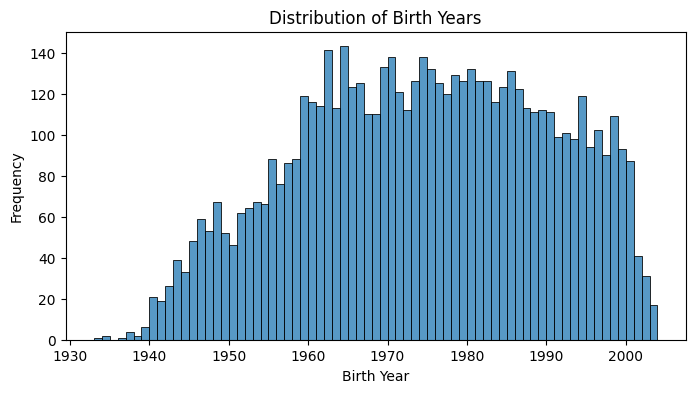

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(cyclists_df['birth_year'], binwidth=1)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

Comparing ths plot with the one in data understanding we can observe that the distribution is not affected by this light imputation as the rows involved are very few considering the overall dataset

#### ```height```, ```weight``` columns

Since ```weight``` and ```height``` columns have ~50% of null values we decide to not consider the two column for the general analysis. So we drop that columns and ignore that for the clustering analysis

In [21]:
# Calculate the percentage of null values in the weight and height columns
weight_null_percentage = cyclists_df['weight'].isnull().sum() / len(cyclists_df) * 100
height_null_percentage = cyclists_df['height'].isnull().sum() / len(cyclists_df) * 100

print(f"Percentage of null values in weight column: {weight_null_percentage:.2f}%")
print(f"Percentage of null values in height column: {height_null_percentage:.2f}%")

cyclists_df.drop(columns=['height', 'weight'], inplace=True)

Percentage of null values in weight column: 49.75%
Percentage of null values in height column: 48.69%


#### ```nationality``` column column

We manually impute the only null value for nationality which is the one associated to Scott Davies, who's from Great Britain.


In [22]:
cyclists_df[cyclists_df['nationality'].isnull()]

,_url,name,birth_year,nationality
9,scott-davies,Scott Davies,1995,<NA>


In [23]:
# Set Great Britain as the nationality for the cyclist 'scott-davies'
cyclists_df.loc[cyclists_df['_url'] == 'scott-davies', 'nationality'] = 'Great Britain'

# Verify
cyclists_df[cyclists_df['_url'] == 'scott-davies']

,_url,name,birth_year,nationality
9,scott-davies,Scott Davies,1995,Great Britain


Final check over cyclists dataframe to check the dataset

In [24]:
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6094 entries, 0 to 6133
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _url         6094 non-null   string
 1   name         6094 non-null   string
 2   birth_year   6094 non-null   Int64 
 3   nationality  6094 non-null   string
dtypes: Int64(1), string(3)
memory usage: 244.0 KB


## Races Dataset

### Duplicate removal

All rows that have  duplicate cyclists for the same ```_url``` and are removed. We drop both the duplicates since we don't know which one is the correct one.

In [25]:
# Group by '_url' and filter out rows where 'cyclist' is duplicated within each group
initial_row_count = races_df.shape[0]
races_df = races_df[~races_df.duplicated(subset=['_url', 'cyclist'], keep=False)]

dropped_rows = initial_row_count - races_df.shape[0]
print(f"Number of dropped rows: {dropped_rows}")

Number of dropped rows: 249


We verify once more if dropping these cyclists results in any cyclists appearing in the cyclists dataframe but missing from the races dataframe. However, as shown in the cell below, no cyclists are removed from the races dataframe after the previous drop.

In [26]:
# Identify cyclists who did not participate in races
cyclists_not_in_races = np.setdiff1d(cyclists_df['_url'].unique(), races_df['cyclist'].unique())

initial_cyclists_count = len(cyclists_df)

# Remove cyclists who did not participate
cyclists_df = cyclists_df[~cyclists_df['_url'].isin(cyclists_not_in_races)]

removed_cyclists_count = initial_cyclists_count - len(cyclists_df)

print(f"Occurrences of cyclists removed: {removed_cyclists_count}")

Occurrences of cyclists removed: 0


### Per column cleaning

#### ```points``` column

In [27]:

print(f"Number of missing values in 'points' column: {int(races_df['points'].isnull().sum())}")

Number of missing values in 'points' column: 477


We show which stages have missing points, hoping that they are few stages

In [28]:
races_df[races_df['points'].isnull()]['_url'].value_counts()

_url
vuelta-a-espana/1994/stage-5    165
tour-de-france/2019/stage-19    155
tour-de-france/1986/stage-19    135
tour-de-france/1988/prologue     22
Name: count, dtype: int64

We can notice that only four over more then five thousand stages do not have points information. So we decide to impute missing values usign a **segmentation approach**: we compute the median value of that particular stage across the years.

In [29]:
null_urls = ['vuelta-a-espana/1994/stage-5', 'tour-de-france/2019/stage-19', 'tour-de-france/1986/stage-19', 'tour-de-france/1988/prologue']

for url in null_urls:
    # split the url by '/'
    url_parts = url.split('/')
    # find the urls with the same first and third parts excluding the second part
    matching_urls = races_df['_url'].apply(lambda x: x.split('/')).apply(lambda x: x[0] == url_parts[0] and x[2] == url_parts[2] and x[1] != url_parts[1])
    # calculate the median points for the matching urls
    median = races_df[matching_urls]['points'].median()
    # update the null values with the median
    races_df.loc[races_df['_url'] == url, 'points'] = races_df.loc[races_df['_url'] == url, 'points'].fillna(median)
    
# Verify the null values have been updated
int(races_df['points'].isnull().sum())

0

Check which is the median value imputed

In [30]:
null_urls = ['vuelta-a-espana/1994/stage-5', 'tour-de-france/2019/stage-19', 'tour-de-france/1986/stage-19', 'tour-de-france/1988/prologue']
for url in null_urls:
    points = races_df[races_df['_url'] == url]['points'].values[0]
    print(f"{url}: {points}")

vuelta-a-espana/1994/stage-5: 80.0
tour-de-france/2019/stage-19: 100.0
tour-de-france/1986/stage-19: 100.0
tour-de-france/1988/prologue: 100.0


#### ```uci_points``` column

As they have a lot of missing values and we have points infomation, we decide to drop this column.

In [31]:
races_df.drop(columns=['uci_points'], inplace=True)

#### ```climb_total``` and ```profile``` column

Given that ```climb_total``` and ```profile``` columns has a lot of null values but are important in evaluating the complexity of a stage we decided to drop the rows with null values. Given that dropping the more then 140k rows implied in this cleaning lead to the droping of more then two thousand stages we decide to postpone this phase to not drop stages informations that can be useful for cyclists dataframe feature engineering

In [32]:
climb_total_null_count = races_df['climb_total'].isnull().sum()
print(f"Number of missing values in 'climb_total' column: {climb_total_null_count}")

Number of missing values in 'climb_total' column: 146908


In [33]:
null_profile_count = races_df[races_df['climb_total'].notnull()]['profile'].isnull().sum()
print(f"Number of null values in 'profile' column where 'climb_total' is not null: {null_profile_count}")

Number of null values in 'profile' column where 'climb_total' is not null: 33648


In [34]:
tot = null_profile_count + climb_total_null_count
print(f"Number of rows dropped after this analysis: {tot}")

Number of rows dropped after this analysis: 180556


In [35]:
unique_null_climb_total_urls = races_df[races_df['climb_total'].isnull()]['_url'].nunique()
unique_null_profile_urls = races_df[races_df['climb_total'].notnull() & races_df['profile'].isnull()]['_url'].nunique()
dropped = unique_null_climb_total_urls + unique_null_profile_urls

print(f"With this analysis we drop {dropped} stages over {races_df['_url'].nunique()} unique stages")


With this analysis we drop 2667 stages over 5281 unique stages


#### ```average_temperature``` column

Since we have few known values, we decide to drop the column.

In [36]:
races_df.drop(columns=['average_temperature'], inplace=True)

### ```date``` column -> ```start_date```, ```duration``` column 

We definetly separate date and start_date for simplicity

In [37]:
# First convert the 'date' column to datetime format
races_df['date'] = pd.to_datetime(races_df['date'])

Split the column in ```start_date``` and ```duration```

In [38]:
# Split the 'date' column into 'start_date' and 'duration'
races_df['start_date'] = races_df['date'].dt.date
races_df['duration'] = races_df['date'].dt.time
races_df.drop(columns=['date'], inplace=True)

#### ```is_cobbled```, ```is_gravel``` columns

Since all the values are False so they are not informative, we decide to drop the columns.

In [39]:
races_df.drop(columns=['is_cobbled', 'is_gravel'], inplace=True)

#### ```delta``` column

Since the delta column contains some negative values which are not admissible and, more in general, the column is not useful for our analysis, we decide to drop it.

In [40]:
races_df.drop(columns=['delta'], inplace=True)

### **OBS:**
we should check the question of deltas and dates, if indeed all deltas can be derived from deltas (which seem to represent the duration of the race) then we can discard deltas. (deltas are the differences in the dates) 

### Store cleaned datasets

Let's see which columns we left in each dataset

In [41]:
from pprint import pprint

print("Remaining columns in cyclists_df:")
print(cyclists_df.columns.tolist())

print("\nRemaining columns in races_df:")
pprint(races_df.columns.tolist())

Remaining columns in cyclists_df:
['_url', 'name', 'birth_year', 'nationality']

Remaining columns in races_df:
['_url',
 'name',
 'points',
 'length',
 'climb_total',
 'profile',
 'startlist_quality',
 'position',
 'cyclist',
 'cyclist_age',
 'is_tarmac',
 'cyclist_team',
 'start_date',
 'duration']


In [43]:
cyclists_df.to_csv('../dataset/cleaned_cyclists.csv', index=False)
races_df.to_csv('../dataset/cleaned_races.csv', index=False)